In [1]:
# This is where all the data exists at NCSA
DATA_DIR = '/project/shared/BOT/'

# Where to store your stuff (change YOURNAME to your username)
REPO_DIR = '/home/sarujin/DATA/STACK_CLUB_BOT_TEST/' 
CALIB_DIR = REPO_DIR + "CALIB"
RERUN_DIR = REPO_DIR + "calib_construction"

# Create the REPO_DIR and add the mapper.
! mkdir -p {REPO_DIR}
! echo "lsst.obs.lsst.lsstCamMapper.LsstCamMapper" > {REPO_DIR+"_mapper"}
! mkdir -p {CALIB_DIR}


In [2]:
!echo $USERNAME

In [3]:
# Now create a master bias for a detector 
RAFT, DETECTOR_NAME, DETECTOR= 'R22','S11',94

# use only 5 bias frames with visit numbers
start=3019103101866
end  =3019103101870

# compose the arguments for command line
args = DATA_DIR + " --calib " + CALIB_DIR + \
       " --rerun " + RERUN_DIR + \
       " --id visit=%d..%d detector=%d"%(start,end,DETECTOR) + \
       " --batch-type=None" + " -c isr.doCrosstalk=False" + \
" --clobber-config"

print(args)

! constructBias.py {args}


/project/shared/BOT/ --calib /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB --rerun /home/sarujin/DATA/STACK_CLUB_BOT_TEST/calib_construction --id visit=3019103101866..3019103101870 detector=94 --batch-type=None -c isr.doCrosstalk=False --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/bias.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(inputs=inputs, outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be 

/home/sarujin/DATA/STACK_CLUB_BOT_TEST/calib_construction/bias/2019-11-01/bias-R22-S11-det094_2019-11-01.fits


Text(0.5, 1.0, 'master bias frame \n  raft,sensor=R22,S11')

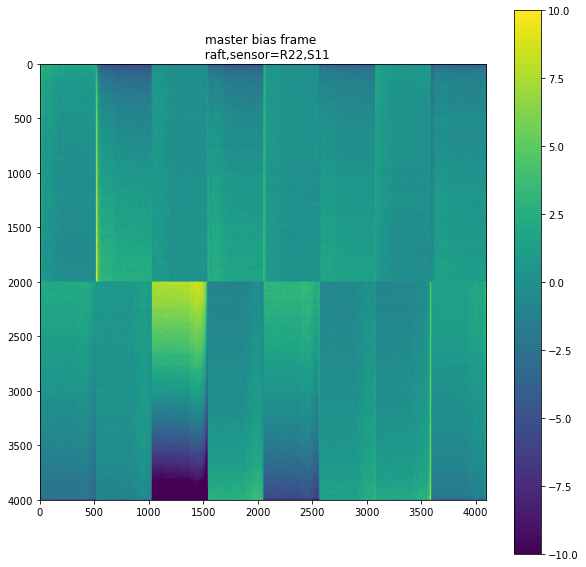

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import glob

biasname=glob.glob(RERUN_DIR + "/bias/*/*.fits")[0]
print(biasname)
bias=fits.getdata(biasname)

plt.figure(figsize=(10,10))
plt.imshow(bias,vmin=-10,vmax=10)
plt.colorbar()
plt.title('master bias frame \n  raft,sensor='+RAFT+','+DETECTOR_NAME)


In [5]:
# Now ingest the master bias image
args = REPO_DIR + " " + RERUN_DIR + "/bias/*/*.fits" + " --validity 9999" + " --calib " + CALIB_DIR + " --mode=link"
! ingestCalibs.py {args}



root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/ingestCalibs.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
CameraMapper INFO: Loading Posix exposure registry from /home/sarujin/DATA/STACK_CLUB_BOT_TEST
ingestCalibs INFO: /home/sarujin/DATA/STAC

In [6]:
# Now create a master dark
# first make a list of visits
# Five 30 second darks
visits = []
starting_visit = 3019103101871
ending_visit   = 3019103101875
visit = starting_visit
while visit < ending_visit + 1:
    visits.append(visit)
    visit += 1
print(len(visits))


5


In [7]:
# create constructDark args string

args = DATA_DIR + " --calib " + CALIB_DIR + " --rerun " + RERUN_DIR + " --id visit="
for visit in visits:
    if visit != starting_visit:
        args += "^"
    args += str(visit)
args += " detector=%d"%DETECTOR
args += " --batch-type=None" + " -c isr.doCrosstalk=False " +  "--clobber-config"
print(args)
! constructDark.py {args}



/project/shared/BOT/ --calib /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB --rerun /home/sarujin/DATA/STACK_CLUB_BOT_TEST/calib_construction --id visit=3019103101871^3019103101872^3019103101873^3019103101874^3019103101875 detector=94 --batch-type=None -c isr.doCrosstalk=False --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/dark.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(inputs=inputs, outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has bee

In [8]:
# Now ingest the master dark image
args = REPO_DIR + " " + \
       RERUN_DIR + "/dark/*/*.fits" + \
       " --validity 9999" + \
       " --calib " + CALIB_DIR + \
       " --mode=link"

! ingestCalibs.py {args}



root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/ingestCalibs.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
CameraMapper INFO: Loading Posix exposure registry from /home/sarujin/DATA/STACK_CLUB_BOT_TEST
CameraMapper INFO: Loading calib registry 

In [9]:
# Now create a master flat
visits = []
starting_visit = 3019110200307
ending_visit = 3019110200308

visit = starting_visit
while visit < ending_visit + 1:
    visits.append(visit)
    visit += 1
print(len(visits))




2


In [10]:
args = DATA_DIR + " --calib " + CALIB_DIR + " --rerun " + RERUN_DIR + " --id visit="
for visit in visits:
    if visit != starting_visit:
        args += "^"
    args += str(visit)

args += " detector=%d"%DETECTOR
args += " --batch-type=None" + " -c isr.doCrosstalk=False" + " --clobber-config"

print(args)

! constructFlat.py {args}



/project/shared/BOT/ --calib /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB --rerun /home/sarujin/DATA/STACK_CLUB_BOT_TEST/calib_construction --id visit=3019110200307^3019110200308 detector=94 --batch-type=None -c isr.doCrosstalk=False --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/flat.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(inputs=inputs, outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:689: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be r

/project/shared/BOT/ --calib /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB --rerun /home/sarujin/DATA/STACK_CLUB_BOT_TEST/calib_construction --id visit=3019110200307^3019110200308 detector=94 --batch-type=None -c isr.doCrosstalk=False --clobber-config
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.12-cf0ec7b/Linux64/obs_lsst/19.0.0-53-g56b0ea1+5/config/flat.py'
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/teststand/BOT/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /home/sarujin/DATA/STACK_CLUB_BOT_TEST/CALIB/calibRegistry.sqlite3
root WARN: Unexpected ID visit; guessing type is "str"
root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-4.7.12-cf0ec7b/Linux64/obs_lsst/19.0.0-53-g56b0ea1+5/config

In [11]:
# Now ingest the master flat images
args = REPO_DIR + " " + RERUN_DIR + \
       "/flat/*/*/*.fits" + \
       " --validity 9999" + \
       " --calib " + CALIB_DIR + \
       " --mode=link"

! ingestCalibs.py {args}





root INFO: Loading config overrride file '/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_lsst/22.0.1-32-g1936776+50d776603f/config/ingestCalibs.py'
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/pipe_base/22.0.1-20-g5ce7af2+ff3b2f8649/python/lsst/pipe/base/argumentParser.py:693: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
CameraMapper INFO: Loading Posix exposure registry from /home/sarujin/DATA/STACK_CLUB_BOT_TEST
CameraMapper INFO: Loading calib registry 

In [12]:
from lsst.daf.persistence import Butler

spot_visit = 3019103101985  
#This is a medium exposure
butler = Butler(DATA_DIR, calibRoot=CALIB_DIR)
spotDataRef = butler.dataRef('raw', raftName=RAFT,
                             detectorName=DETECTOR_NAME,
                             visit=spot_visit)


<ipython-input-12-70e90a293530>:5: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler(DATA_DIR, calibRoot=CALIB_DIR)
<ipython-input-12-70e90a293530>:5: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler(DATA_DIR, calibRoot=CALIB_DIR)


In [13]:
# configure an IsrTask
from lsst.ip.isr.isrTask import IsrTask
isrConfig = IsrTask.ConfigClass()
isrConfig.doLinearize = False
isrConfig.doBias = True     # use the calibs we made!
isrConfig.doFlat = True
isrConfig.doDark = True
isrConfig.doFringe = False   # we did not do these, skip
isrConfig.doDefect = False
isrConfig.doWrite = False
isrConfig.fallbackFilterName = 'SDSSi~empty'  #  Both of these are needed
isrConfig.useFallbackDate = True              #  Both of these are needed
isrTask = IsrTask(config=isrConfig)
# run the task and take the exposure
postIsrSpot = isrTask.run(spotDataRef).exposure


(minimum=(0, 2002), maximum=(511, 4003)): (minimum=(0, 0), maximum=(511, 2001))
MC_C_20191031_001985: Unable to determine the filter
argDict[boresightAirmass] is None; stripping
MC_C_20191031_001985: Unable to determine the filter
Using fallback calibration from filter SDSSi~empty.
No WCS found in input exposure.
No rough magnitude zero point defined for filter unknown.


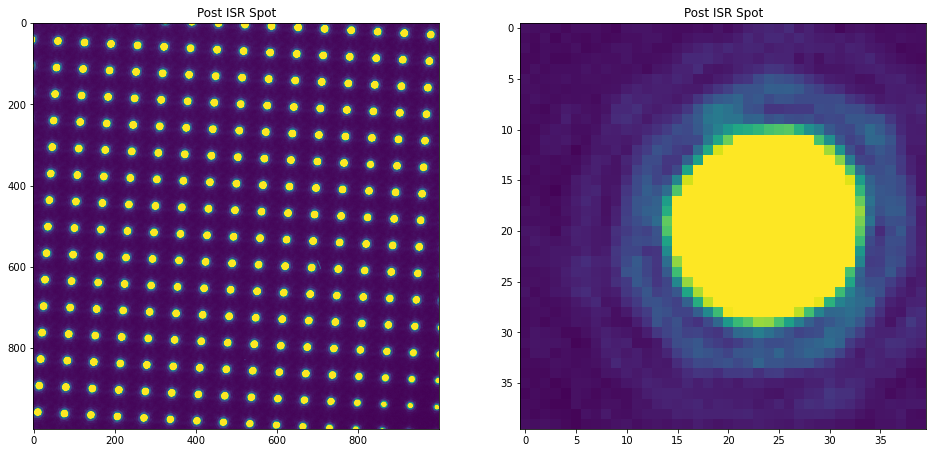

In [14]:
# Now just look at a portion of the images
plt.figure(figsize=(16,16))    
plt.subplot(1,2,1)
plt.title("Post ISR Spot")
plt.imshow(postIsrSpot.image.array[2000:3000,2000:3000],vmin=0,vmax=1000)
plt.subplot(1,2,2)
plt.title("Post ISR Spot")
plt.imshow(postIsrSpot.image.array[2510:2550,2535:2575],vmin=0,vmax=1000)






In [15]:
# Now let's try finding the spots
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask, CharacterizeImageConfig
charConfig = CharacterizeImageConfig()

charConfig.installSimplePsf.fwhm = 1.0   # save a step, start with a guess
charConfig.doMeasurePsf = False          # but you could measure it
charConfig.doApCorr = False              # a lot of nice steps we can skip
charConfig.doDeblend = False
charConfig.repair.doCosmicRay = True
charConfig.repair.doInterpolate = False   
charConfig.detection.background.binSize = 32    # what scale to est. bg
charConfig.detection.minPixels = 20             # min number of pixels
charTask = CharacterizeImageTask(config=charConfig)
charResult = charTask.run(postIsrSpot)

print("Detected ",len(charResult.sourceCat)," objects ")


Source catalog detected and measured with placeholder or default PSF


Detected  2264  objects 


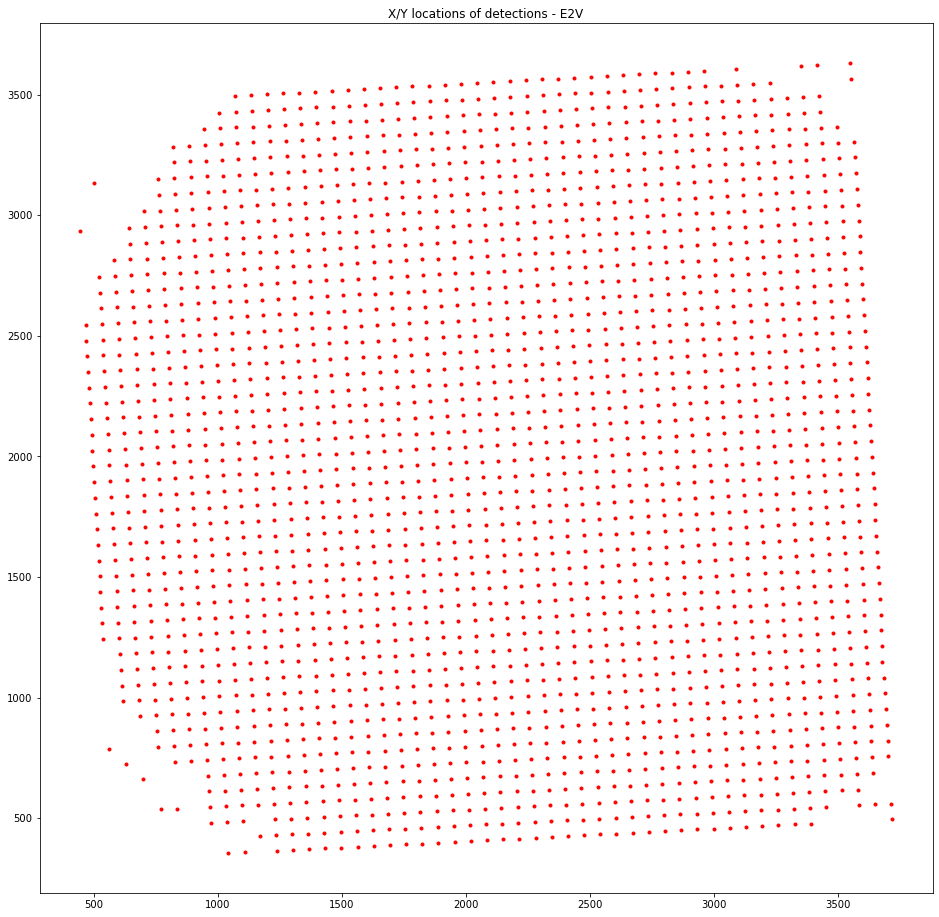

In [16]:
plt.figure(figsize=(16,16))
plt.title('X/Y locations of detections - E2V')
plt.plot(charResult.sourceCat['base_SdssCentroid_x'],
         charResult.sourceCat['base_SdssCentroid_y'],'r.')
